# Data Selection #

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Testing the Random Forest Algorythm on The Same Data that it was Trained On #

[-2.84872467e-02  7.60135054e-03  4.16088961e-02  1.57292109e-01
 -6.59902579e-02 -1.54729746e-01 -1.13059691e-01  1.20448902e-01
 -3.33584905e-02 -4.22241395e-01 -1.96186987e-01 -2.31698364e-01
  7.66503182e-02 -1.38049475e-01  2.75845565e-01 -1.10058253e-01
 -3.64882367e-01  3.16403086e-01 -2.48930260e-02 -1.26220260e-01
 -9.30297731e-02  5.23818890e-02  6.01037131e-02  1.09390157e-01
  1.03589089e-01  6.20769048e-02  9.76147931e-02  1.34466350e-01
  1.63482349e-01  6.64168048e-02 -4.66563569e-02 -3.07774179e-02
  7.31550064e-03  1.39549308e-01  1.56602649e-02  4.65263228e-03
 -5.51667494e-02 -1.61880805e-01  5.07615495e-02 -1.00243710e-01
 -6.52904210e-02 -1.75098649e-01 -1.89280714e-01 -1.97393732e-02
  7.36669218e-02 -8.09741695e-05 -1.91488271e-01 -1.46656367e-02
 -1.98676646e-01  4.77898222e-02 -7.16869328e-02 -8.16027691e-02
  1.92360134e-03 -9.13098549e-02  1.48336743e-01  2.11116305e-02
  2.13586412e-01 -4.61942370e-02  1.11456846e-01 -9.43672237e-02
 -1.61158503e-01 -5.07266

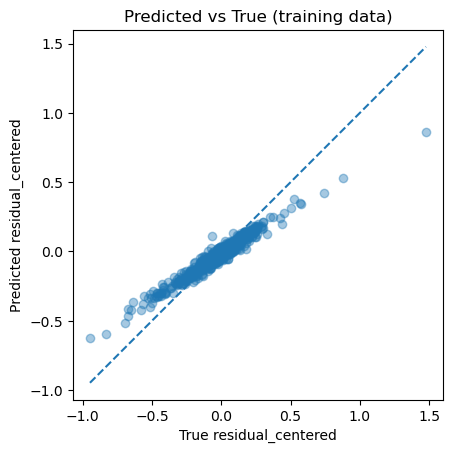

In [2]:
df = pd.read_csv("ZTF_DESI_data/ZTF_snia_DESI_fastspec_hostprops_papercuts_hostcuts.csv")

# ---------------------------------------------------------
# 2. Features + target
# ---------------------------------------------------------
features = [
    "LOGMSTAR",
    "SFR",
    "AGE",
    "DN4000",
    "VDISP",
    "SDSS_g_minus_r",
]

target = "residual_centered"

X = df[features]
y = df[target]

# ---------------------------------------------------------
# 3. Train Random Forest on ALL DATA
# ---------------------------------------------------------
regr = RandomForestRegressor(
    n_estimators=500,
    max_depth=200,
    random_state=42,
    n_jobs=-1,
)

regr.fit(X, y)

# ---------------------------------------------------------
# 4. Predict on ALL DATA
# ---------------------------------------------------------
y_pred = regr.predict(X)

print(y_pred)


plt.scatter(y, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--")  # 1:1 line
plt.xlabel("True residual_centered")
plt.ylabel("Predicted residual_centered")
plt.title("Predicted vs True (training data)")
plt.gca().set_aspect("equal", "box")
plt.show()

# Doing a Train-Test Split on that Same Data #

[-0.00036056 -0.0046791  -0.10076657  0.02233628 -0.12102436  0.08773447
  0.01933236 -0.04351353 -0.01663468 -0.02586993 -0.02541018 -0.10926954
 -0.04570496 -0.07862075 -0.03075615 -0.02373736 -0.00041183 -0.06901152
 -0.01263542 -0.08065204 -0.13183627 -0.02293311 -0.00069935 -0.15997386
 -0.03739122  0.01807475 -0.10381639 -0.10570908  0.03781624 -0.04640241
 -0.06626701 -0.02445766 -0.13088454 -0.01346689  0.02823842 -0.04370372
  0.06636004 -0.13784551 -0.01363449 -0.05676703  0.01438861 -0.2169062
 -0.12200505  0.03545927 -0.07539793 -0.21252378 -0.04738961 -0.02425794
 -0.06119191  0.0377175   0.01051177 -0.07545688 -0.07221421 -0.04309231
  0.05454201  0.03244186 -0.13732634 -0.01467999  0.00471821 -0.07528671
 -0.01020462  0.01417121 -0.0795643  -0.15879016  0.02791125  0.06110175
 -0.21450519  0.0219733  -0.00761314 -0.12588389 -0.13168589 -0.11825286
  0.06698126  0.01426606 -0.09226746 -0.07675646  0.08166887  0.09892881
 -0.07181545 -0.06454062  0.08854551 -0.06820984 -0.

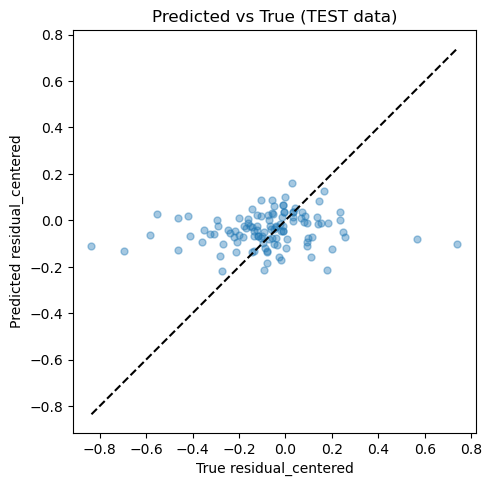

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv(
    "ZTF_DESI_data/ZTF_snia_DESI_fastspec_hostprops_papercuts_hostcuts.csv"
)

# ---------------------------------------------------------
# 2. Features + target
# ---------------------------------------------------------
features = [
    "LOGMSTAR",
    "SFR",
    "AGE",
    "DN4000",
    "VDISP",
    "SDSS_g_minus_r",
]

target = "residual_centered"

X = df[features]
y = df[target]

# ---------------------------------------------------------
# 3. Train/test split
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

# ---------------------------------------------------------
# 4. Train Random Forest on TRAINING DATA ONLY
# ---------------------------------------------------------
regr = RandomForestRegressor(
    n_estimators=1000,
    max_depth=1000,
    random_state=42,
    n_jobs=-1,
)

regr.fit(X_train, y_train)   

# ---------------------------------------------------------
# 5. Predict ONLY on the TEST SET
# ---------------------------------------------------------
y_pred = regr.predict(X_test) 

print(y_pred)

plt.figure(figsize=(5, 5))

plt.scatter(
    y_test,
    y_pred,
    alpha=0.4,
    s=25
)

lims = [
    min(y_test.min(), y_pred.min()),
    max(y_test.max(), y_pred.max()),
]

plt.plot(lims, lims, "--", color="black")  # 1:1 line

plt.xlabel("True residual_centered")
plt.ylabel("Predicted residual_centered")
plt.title("Predicted vs True (TEST data)")
plt.gca().set_aspect("equal", "box")

plt.tight_layout()
plt.show()


# Using the Color and the Stretch Parameters in Order to Train the ML algorythm - Testing on the Same Data we Trained On #

Please note tha tit is very important to use the following file as this is where the distance modulus is defined and computed uncorreced for color or stretch parameters. 

[ 1.40796989e+00 -2.84451630e-01  9.85266867e-02 -1.16048279e-01
  5.17735897e-02  1.68598866e-01  1.05445513e+00 -4.08332492e-01
 -6.47024825e-02  8.09826836e-01  2.77465466e-02 -3.44729043e-01
  1.43098825e-01 -2.12475419e-01  2.15840513e+00  1.68874710e-02
 -4.44175113e-01  2.98444288e-01 -5.62105067e-01  4.67007246e-02
 -3.33563558e-01 -4.97739184e-01 -4.56280996e-01 -1.06223932e-01
  1.27759607e-02  7.10264578e-02 -2.47003797e-01  2.73246385e-01
 -5.94715453e-02  6.69869426e-01  8.46945875e-02 -2.25052094e-01
 -1.57215532e-01 -2.23660840e-01  6.55208061e-01 -1.14807581e-01
 -3.02655917e-01 -2.14031474e-01  1.12675878e-01 -9.46406290e-03
 -3.47198316e-01 -1.00728669e-01  2.49267505e-01  9.57388591e-02
 -3.20650173e-01  2.16993603e-02  2.85574191e-02  3.57976855e-02
  1.97582875e-01 -8.77516595e-02  5.03948199e-01  3.76767001e-01
  1.75149380e-01  1.97239651e-01  2.20031327e-01  3.03708764e-01
  7.86702206e-02  2.64062618e-01 -1.33923103e-01 -3.59013198e-01
 -7.23048621e-02 -1.86410

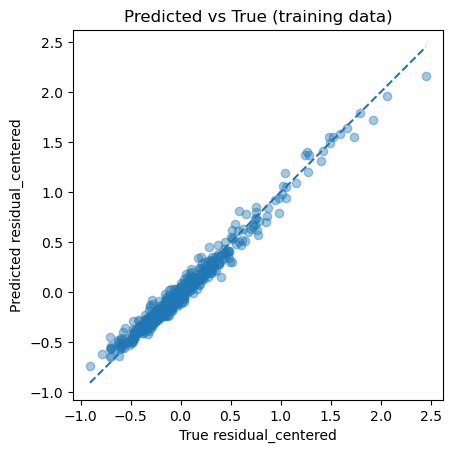

In [4]:
df = pd.read_csv("ZTF_DESI_data/ZTF_residuals_centered_no_x1_no_c_v2.csv")

# ---------------------------------------------------------
# 2. Features + target
# ---------------------------------------------------------
features = [
    "LOGMSTAR",
    "SFR",
    "AGE",
    "DN4000",
    "VDISP",
    "SDSS_g_minus_r",
    "x1",
    "c",
]

target = "residual_centered"

X = df[features]
y = df[target]

# ---------------------------------------------------------
# 3. Train Random Forest on ALL DATA
# ---------------------------------------------------------
regr = RandomForestRegressor(
    n_estimators=500,
    max_depth=200,
    random_state=42,
    n_jobs=-1,
)

regr.fit(X, y)

# ---------------------------------------------------------
# 4. Predict on ALL DATA
# ---------------------------------------------------------
y_pred = regr.predict(X)

print(y_pred)


plt.scatter(y, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--")  # 1:1 line
plt.xlabel("True residual_centered")
plt.ylabel("Predicted residual_centered")
plt.title("Predicted vs True (training data)")
plt.gca().set_aspect("equal", "box")
plt.show()

# Using the Color and the Stretch Parameters in Order to Train the ML algorythm - Testing on the Same Data We Trained On - Just c and x1 #


[ 1.41935711e+00 -2.52885361e-01  1.96241915e-02 -1.07862675e-01
  1.99185892e-02  1.44991062e-01  1.08037766e+00 -3.81702697e-01
 -9.61903367e-02  7.92141618e-01  5.40232832e-02 -3.18379573e-01
  1.51629936e-01 -2.32799407e-01  2.23884419e+00  2.98679134e-02
 -5.05833830e-01  2.92249111e-01 -5.63729131e-01  7.74702586e-02
 -3.54802584e-01 -5.20578162e-01 -4.38211837e-01 -1.24084864e-01
  1.56486162e-02  7.99229933e-02 -2.48555526e-01  2.45096360e-01
 -1.01018088e-01  6.17334877e-01  8.91834411e-02 -2.70899236e-01
 -1.81828446e-01 -2.45413238e-01  6.51963076e-01 -1.27744714e-01
 -2.88282677e-01 -2.12455543e-01  9.93360545e-02  3.64452195e-02
 -3.22825862e-01 -6.84889448e-02  2.90418201e-01  1.20949380e-01
 -3.53806012e-01  6.00202773e-02 -2.48371510e-03  6.26307955e-02
  2.26012306e-01 -1.05414742e-01  4.91749157e-01  4.10273858e-01
  1.54417071e-01  2.15631972e-01  2.13918643e-01  3.90709686e-01
  9.16603564e-02  2.90297922e-01 -1.20465830e-01 -4.41214565e-01
 -2.98809526e-02 -1.92391

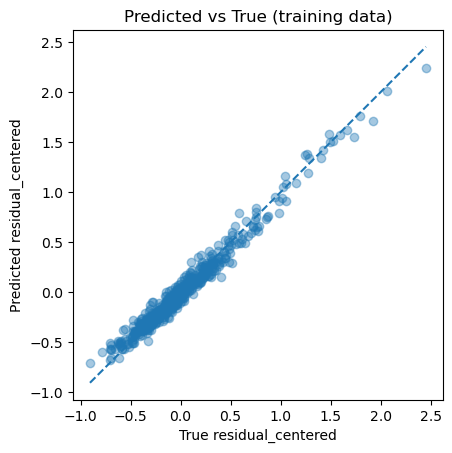

In [5]:
df = pd.read_csv("ZTF_DESI_data/ZTF_residuals_centered_no_x1_no_c_v2.csv")

# ---------------------------------------------------------
# 2. Features + target
# ---------------------------------------------------------
features = [
    # "LOGMSTAR",
    # "SFR",
    # "AGE",
    # "DN4000",
    # "VDISP",
    # "SDSS_g_minus_r",
    "x1",
    "c",
]

target = "residual_centered"

X = df[features]
y = df[target]

# ---------------------------------------------------------
# 3. Train Random Forest on ALL DATA
# ---------------------------------------------------------
regr = RandomForestRegressor(
    n_estimators=500,
    max_depth=200,
    random_state=42,
    n_jobs=-1,
)

regr.fit(X, y)

# ---------------------------------------------------------
# 4. Predict on ALL DATA
# ---------------------------------------------------------
y_pred = regr.predict(X)

print(y_pred)


plt.scatter(y, y_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--")  # 1:1 line
plt.xlabel("True residual_centered")
plt.ylabel("Predicted residual_centered")
plt.title("Predicted vs True (training data)")
plt.gca().set_aspect("equal", "box")
plt.show()

# Now We're Going to Do a Train Test Split for Data that contains c and x1 #

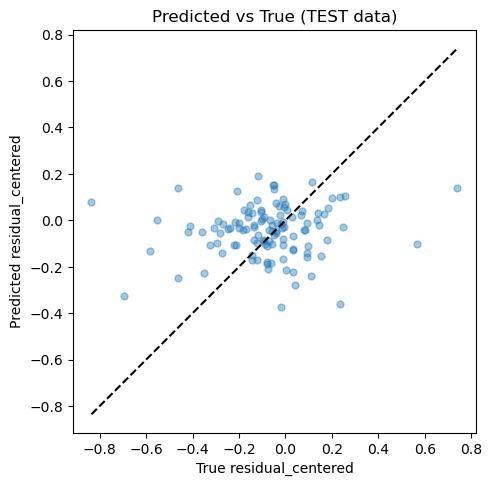

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv(
    "ZTF_DESI_data/ZTF_snia_DESI_fastspec_hostprops_papercuts_hostcuts.csv"
)

# ---------------------------------------------------------
# 2. Features + target
# ---------------------------------------------------------
features = [
    # "LOGMSTAR",
    # "SFR",
    # "AGE",
    # "DN4000",
    # "VDISP",
    # "SDSS_g_minus_r",
    "x1",
    "c",
]

target = "residual_centered"

X = df[features]
y = df[target]

# ---------------------------------------------------------
# 3. Train/test split
# ---------------------------------------------------------
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

# ---------------------------------------------------------
# 4. Train Random Forest on TRAINING DATA ONLY
# ---------------------------------------------------------
regr = RandomForestRegressor(
    n_estimators=500,
    max_depth=500,
    random_state=42,
    n_jobs=-1,
)

regr.fit(X_train1, y_train1)

# ---------------------------------------------------------
# 5. Predict ONLY on the TEST SET
# ---------------------------------------------------------
y_pred1 = regr.predict(X_test1)

plt.figure(figsize=(5, 5))

plt.scatter(
    y_test1,
    y_pred1,
    alpha=0.4,
    s=25
)

lims = [
    min(y_test1.min(), y_pred1.min()),
    max(y_test1.max(), y_pred1.max()),
]

plt.plot(lims, lims, "--", color="black")  # 1:1 line

plt.xlabel("True residual_centered")
plt.ylabel("Predicted residual_centered")
plt.title("Predicted vs True (TEST data)")
plt.gca().set_aspect("equal", "box")

plt.tight_layout()
plt.show()


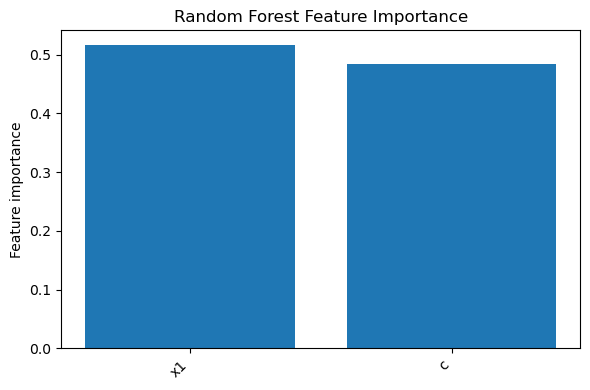

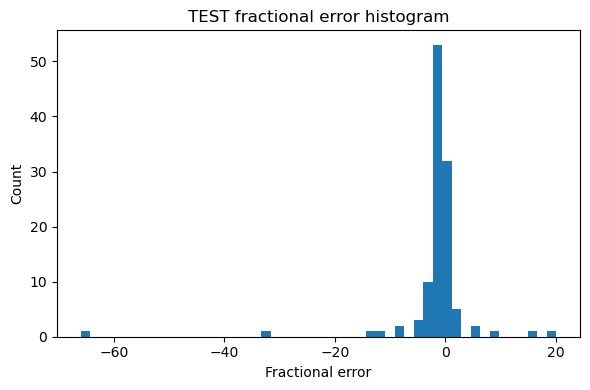

In [7]:
# =========================================================
# Feature importance + fractional-error histogram (ONLY)
# =========================================================

plt.figure(figsize=(6, 4))
plt.bar(features, regr.feature_importances_)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Feature importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# ----------------------------
# 2) Histogram of (pred - real) / real
# ----------------------------

frac_err1 = (y_pred1 - y_test1) / (y_test1)

plt.figure(figsize=(6, 4))
plt.hist(frac_err1, bins=50)
plt.xlabel(r"Fractional error")
plt.ylabel("Count")
plt.title("TEST fractional error histogram")
plt.tight_layout()
plt.show()

# Train Test Split for All Host Galaxy Parameters AND c and x1 #

[-0.05813425 -0.10884932 -0.05583361 -0.03783393 -0.07504416  0.06040929
  0.00083705 -0.05910858  0.01340532  0.0085242  -0.03624176 -0.19005358
 -0.10830927 -0.05092249  0.00297994  0.07063363 -0.08221803  0.00049417
 -0.02325386 -0.26354992 -0.22854846 -0.01369176  0.08200082 -0.12169429
  0.05212809  0.04288565 -0.13683762 -0.09185055  0.00782095 -0.08217681
 -0.04207113 -0.02501077 -0.13635528 -0.03422099 -0.01273275 -0.0850031
 -0.02981419 -0.12944031  0.22052336  0.16526723 -0.00296009 -0.18888352
 -0.00232796  0.01568445 -0.01707449 -0.25415678 -0.03999722 -0.04782339
 -0.24484803  0.10053341 -0.09828705 -0.09570988 -0.04336963 -0.08714529
 -0.01693386  0.02953647 -0.15799646  0.08795787 -0.00342219 -0.06907486
 -0.15464171 -0.01585472  0.09812348 -0.07564775  0.00229963  0.01568202
 -0.24427887 -0.05417792 -0.00309876 -0.15006913 -0.06971204 -0.19421656
 -0.05819475 -0.05438658 -0.19556378 -0.06375305  0.01098028  0.0824346
 -0.05213622 -0.21486452  0.04891526 -0.08389391 -0.0

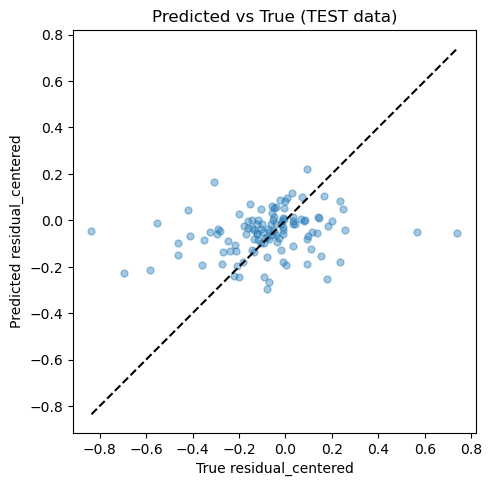

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv(
    "ZTF_DESI_data/ZTF_snia_DESI_fastspec_hostprops_papercuts_hostcuts.csv"
)

# ---------------------------------------------------------
# 2. Features + target
# ---------------------------------------------------------
features = [
    "LOGMSTAR",
    "SFR",
    "AGE",
    "DN4000",
    "VDISP",
    "SDSS_g_minus_r",
    "x1",
    "c",
]

target = "residual_centered"

X = df[features]
y = df[target]

# ---------------------------------------------------------
# 3. Train/test split
# ---------------------------------------------------------
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

# ---------------------------------------------------------
# 4. Train Random Forest on TRAINING DATA ONLY
# ---------------------------------------------------------
regr = RandomForestRegressor(
    n_estimators=500,
    max_depth=500,
    random_state=42,
    n_jobs=-1,
)

regr.fit(X_train2, y_train2) 

# ---------------------------------------------------------
# 5. Predict ONLY on the TEST SET
# ---------------------------------------------------------
y_pred2 = regr.predict(X_test2)

print(y_pred2)

plt.figure(figsize=(5, 5))

plt.scatter(
    y_test2,
    y_pred2,
    alpha=0.4,
    s=25
)

lims = [
    min(y_test2.min(), y_pred2.min()),
    max(y_test2.max(), y_pred2.max()),
]

plt.plot(lims, lims, "--", color="black")  # 1:1 line

plt.xlabel("True residual_centered")
plt.ylabel("Predicted residual_centered")
plt.title("Predicted vs True (TEST data)")
plt.gca().set_aspect("equal", "box")

plt.tight_layout()
plt.show()


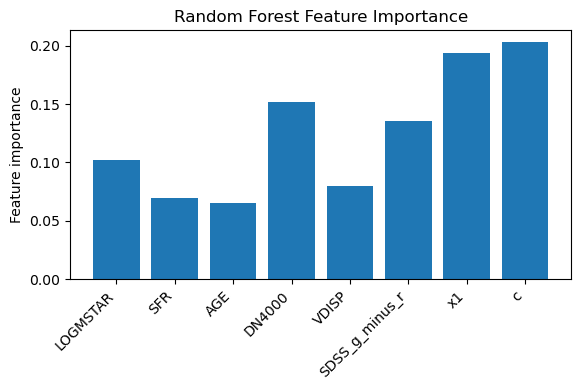

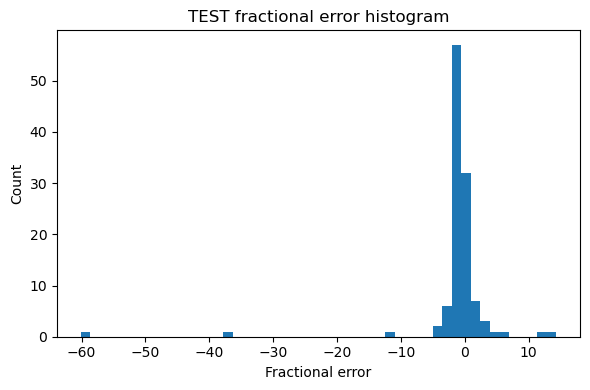

In [9]:
# =========================================================
# Feature importance + fractional-error histogram (ONLY)
# =========================================================

plt.figure(figsize=(6, 4))
plt.bar(features, regr.feature_importances_)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Feature importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# ----------------------------
# 2) Histogram of (pred - real) / real
# ----------------------------

frac_err2 = (y_pred2 - y_test2) / (y_test2)

plt.figure(figsize=(6, 4))
plt.hist(frac_err2, bins=50)
plt.xlabel(r"Fractional error")
plt.ylabel("Count")
plt.title("TEST fractional error histogram")
plt.tight_layout()
plt.show()

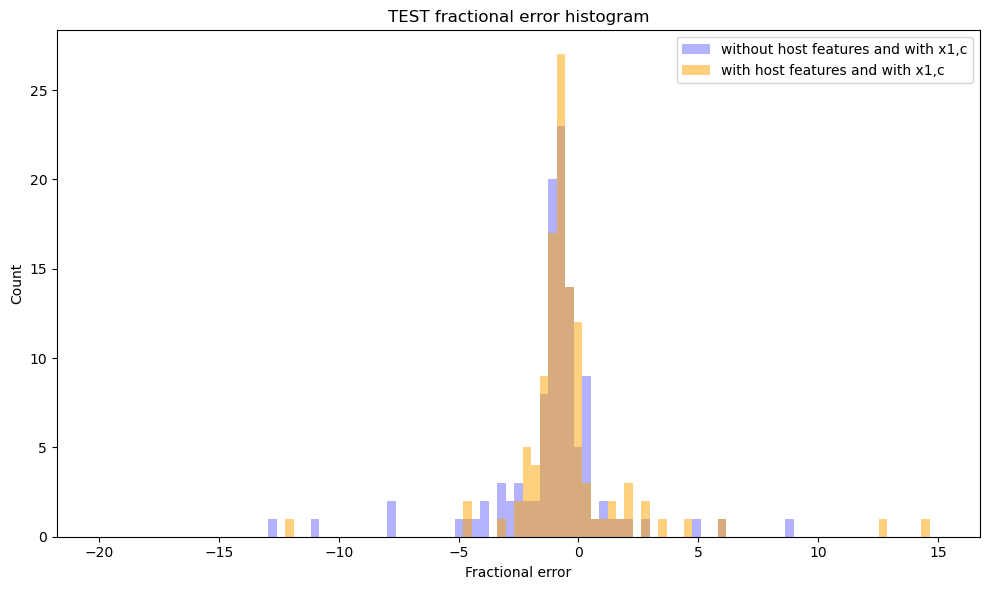

In [10]:
bins = np.linspace(-20, 15, 100)

plt.figure(figsize=(10, 6))
plt.hist(frac_err1, bins=bins, label="without host features and with x1,c", alpha= 0.3, color ='blue')
plt.hist(frac_err2, bins=bins, label="with host features and with x1,c",alpha=0.5, color='orange')
plt.xlabel(r"Fractional error")
plt.ylabel("Count")
plt.title("TEST fractional error histogram")
plt.legend()
plt.tight_layout()
plt.show()

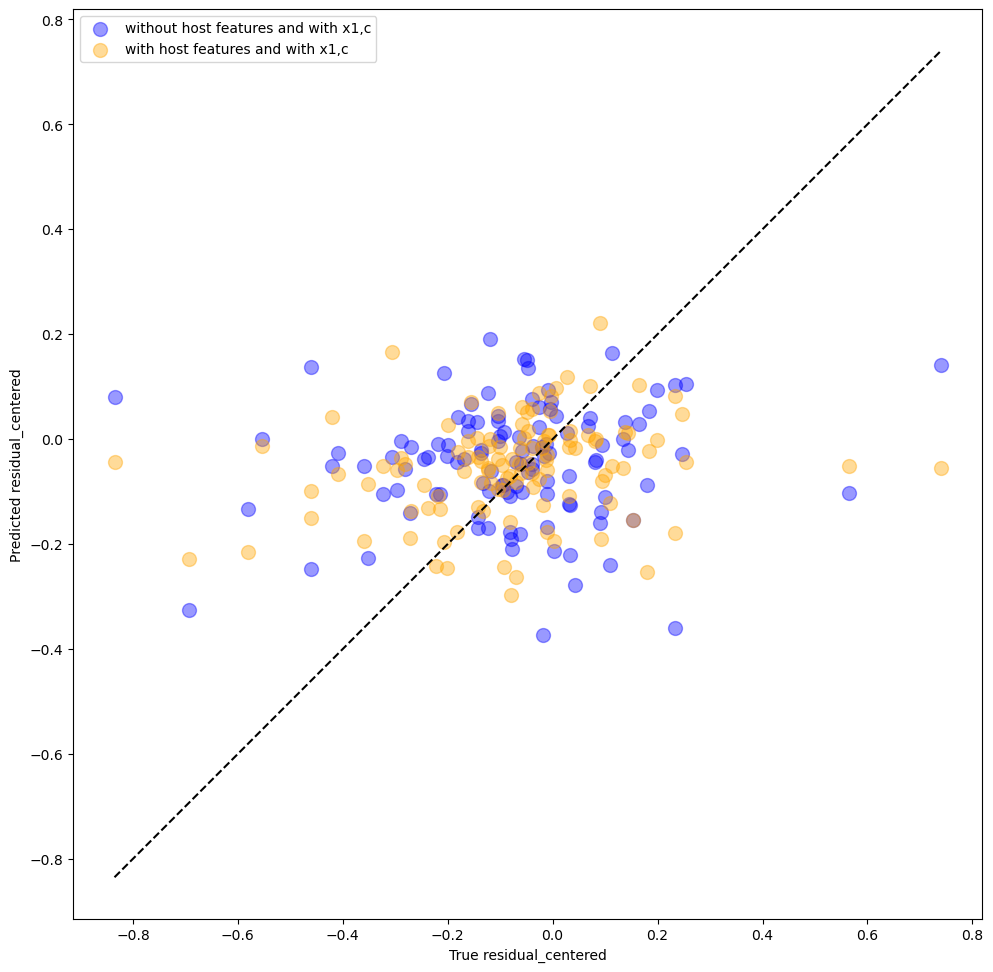

In [11]:
plt.figure(figsize=(10, 10))

plt.scatter(
    y_test1,
    y_pred1,
    alpha=0.4,
    s=100,
    label ="without host features and with x1,c",
    color = 'blue'
)

plt.scatter(
    y_test2,
    y_pred2,
    alpha=0.4,
    s=100,
    label ="with host features and with x1,c",
    color = 'orange'
)

lims = [
    min(y_test2.min(), y_pred2.min()),
    max(y_test2.max(), y_pred2.max()),
]

plt.plot(lims, lims, "--", color="black")  # 1:1 line

plt.xlabel("True residual_centered")
plt.legend()
plt.ylabel("Predicted residual_centered")
plt.gca().set_aspect("equal", "box")

plt.tight_layout()
plt.show()
